In [1]:
import SPAIdermenLib as SPAI
import matplotlib.pyplot as plt

2023-12-01 10:24:59.506092: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 10:25:02.359371: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/home/rcw/anaconda3/lib/python3.11/site-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


In [2]:
P = SPAI.getFromFile('070', 'room_impulse_responses.mat')
Q = SPAI.getFromFile('080', 'room_impulse_responses.mat')

R = SPAI.getFromFile('075', 'room_impulse_responses.mat')
kappa = 0.5
P

19
19
19


[{'position': (0.0, 0.0, 0.0), 'pressure': array([4.39882278e-05])},
 {'position': (0.0, 0.0, 0.0), 'pressure': array([7.18832016e-05])},
 {'position': (0.0, 0.0, 0.0), 'pressure': array([5.37633896e-05])},
 {'position': (0.0, 0.0, 0.0), 'pressure': array([2.39610672e-05])},
 {'position': (0.0, 0.0, 0.0), 'pressure': array([0.00011599])},
 {'position': (0.0, 0.0, 0.0), 'pressure': array([2.14576721e-05])},
 {'position': (0.0, 0.0, 0.0), 'pressure': array([7.66515732e-05])},
 {'position': (0.0, 0.0, 0.0), 'pressure': array([1.21593475e-05])},
 {'position': (0.0, 0.0, 0.0), 'pressure': array([4.37498093e-05])},
 {'position': (0.0, 0.0, 0.0), 'pressure': array([5.68628311e-05])},
 {'position': (0.0, 0.0, 0.0), 'pressure': array([1.88350677e-05])},
 {'position': (-0.056546368374244774,
   0.032312210499568436,
   0.05654636837424479),
  'pressure': array([2.37226486e-05])},
 {'position': (-0.04422680978583967,
   0.07710219661721947,
   0.028806370462395797),
  'pressure': array([3.9219856

In [3]:
T, u, v = SPAI.cp_transport_plan(P, Q)

Processing...
Dimensions of m_ones: (2400, 1)
Dimensions of C: (2400, 2400)


/home/rcw/anaconda3/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


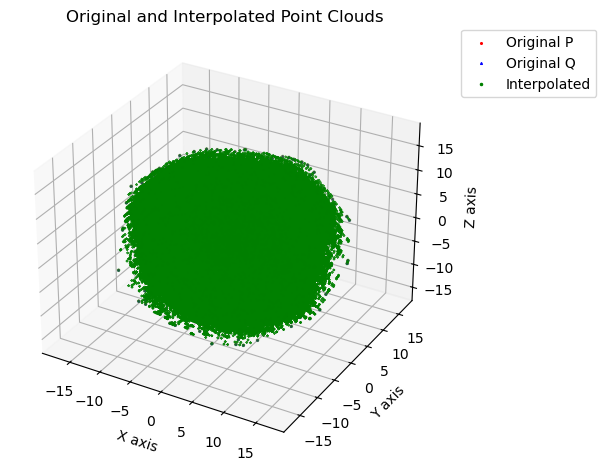

In [4]:
SPAI.visualize_interpolation(P, Q, T, u, v, kappa)

In [5]:
speed_of_sound = 343
sampling_rate = 48000
max_simulation_time = 0.1  # in seconds

X_1 = SPAI.construct_interpolated_point_cloud(P, Q, T, u, v, kappa)
X_1

[{'position': (0.0, 0.0, 0.0), 'pressure': 1.7118984819174723},
 {'position': (0.0, 0.0, 0.0), 'pressure': 1.7118984819212664},
 {'position': (0.0, 0.0, 0.0), 'pressure': 1.7118984819188023},
 {'position': (0.0, 0.0, 0.0), 'pressure': 1.7118984819147565},
 {'position': (0.0, 0.0, 0.0), 'pressure': 1.7118984819272585},
 {'position': (0.0, 0.0, 0.0), 'pressure': 1.7118984819144318},
 {'position': (0.0, 0.0, 0.0), 'pressure': 1.71189848192191},
 {'position': (0.0, 0.0, 0.0), 'pressure': 1.7118984819131402},
 {'position': (0.0, 0.0, 0.0), 'pressure': 1.7118984819174479},
 {'position': (0.0, 0.0, 0.0), 'pressure': 1.7118984819192373},
 {'position': (0.0, 0.0, 0.0), 'pressure': 1.7118984819140648},
 {'position': (-0.028273184187122387,
   0.016156105249784218,
   0.028273184187122394),
  'pressure': 2.6509162213737496e-15},
 {'position': (-0.022113404892919835,
   0.038551098308609734,
   0.014403185231197898),
  'pressure': 2.2587621127996335e-15},
 {'position': (-0.015701465918676626,
   0

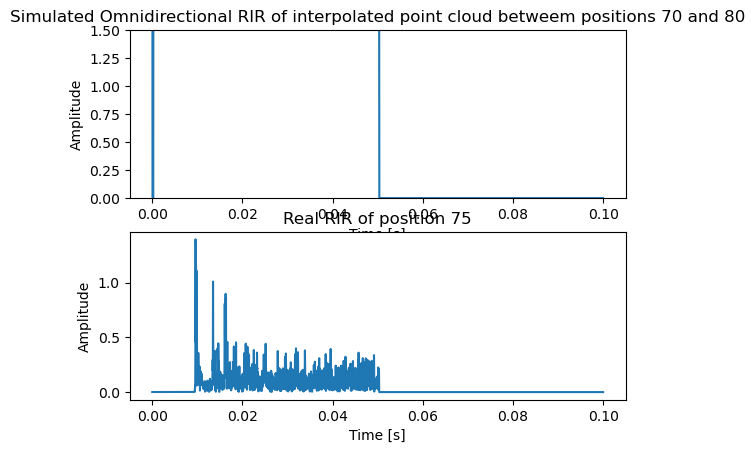

In [7]:
t1, h_t1 = SPAI.calculate_omnidirectional_RIR(X_1, speed_of_sound, sampling_rate, max_simulation_time)
t2, h_t2 = SPAI.calculate_omnidirectional_RIR(R, speed_of_sound, sampling_rate, max_simulation_time)

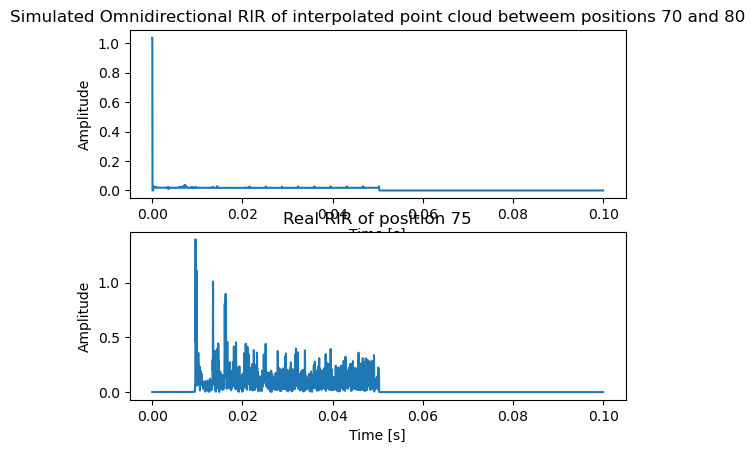

In [10]:
# Plot the RIR
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t1, h_t1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Simulated Omnidirectional RIR of interpolated point cloud betweem positions 70 and 80')

plt.subplot(2, 1, 2)
plt.plot(t2, h_t2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Real RIR of position 75')
plt.show()